# LeNet
등장 배경:
손글씨 숫자 인식 (MNIST) 문제 해결을 위해 개발됨.당시로서는 혁신적인 구조지만,
컴퓨팅 파워 부족과 대량 데이터 부족으로 제한적 사용.
기술적 특이점:
초기 CNN 구조의 대표: Conv → Pool → FC 구조 확립
Activation 함수로 tanh 사용
# 이미지에서 특징을 추출하고 분류하는 계층 구조 개념 정립

# AlexNet
등장 배경:
GPU의 발전, 대용량 데이터셋(ImageNet)의 등장
기존 전통적인 머신러닝 기법(SVM + hand-crafted features)을 압도
기술적 특이점:
ReLU 도입으로 학습 속도 대폭 향상
GPU 병렬 연산 (당시 GTX 580 두 개 사용)
Dropout 도입 → 과적합 방지
CNN이 비전 분야를 지배하는 시작점

# VGGNet
등장 배경:
AlexNet 이후, 단순하지만 깊은 구조가 성능 향상에 중요하다는 가설을 실험
기술적 특이점:
3x3 필터만 사용, 깊이 증가(16~19 layers)
단순하고 반복적인 구조 → 하드웨어 최적화 용이
파라미터 수는 많지만, 구조가 정형화되어 모듈화에 용이

# Inception(GoogleNet)
등장 배경:
VGG는 깊이 증가로 인한 연산량 증가 문제가 있었음
다양한 필터 크기를 병렬로 사용하는 아이디어로 정보 손실 방지 + 계산 효율화
기술적 특이점:
Inception 모듈: 1x1, 3x3, 5x5 컨볼루션을 병렬로 수행
연산량 줄이기 위해 1x1 conv로 차원 축소
Network-in-Network 개념 적용
깊고 넓은 네트워크 구조 설계 가능

# ResNet(Residual Network)
등장 배경:
딥러닝의 깊이가 증가할수록 기울기 소실(Vanishing Gradient) 문제 발생
깊은 네트워크가 오히려 성능 저하 (degradation) 현상 발생
“이전보다 더 깊은 네트워크가 왜 더 못하냐?”는 문제의식
기술적 특이점:
Residual Learning 도입: 𝑦=𝐹(𝑥)+𝑥
학습할 함수를 직접 예측하는 게 아니라 잔차(residual)를 학습
매우 깊은 구조(152 layers 이상)도 안정적으로 학습 가능
이후 모든 모델의 표준 설계 요소가 됨

단어를 토크나이징해서 정해진 방법으로 토크나이징해서 특정한 문장을 보통 바이트 페어로 잘라서
2바이트씩 한글은 2바이트 인코딩될때 차원수를 정해주면 2000차원이면 2000개의 숫자로 정의됨
rnn은 위치가 중요함 위치인코딩을 해줄때 0,1,2로 할수도 있지만 그러면 너무 커져서 싸인과 코싸인을 사용함
교차하며 규칙성을 가지며 적절한 변화를 통해 문장이 들어올때마다 똑같이 위치를 줌, 신조어와 같은건 옛날 방식으로 학습이 안됨
하지만 지금은 사인 코사인 따라 위치를 줌 규칙성이 가미된 포지셔널 인베딩이 가능하고 토크나이징이 가능 3,4로 넣으면 3,4로 나옴
어텐션과 레즈넷을 통해 학습함


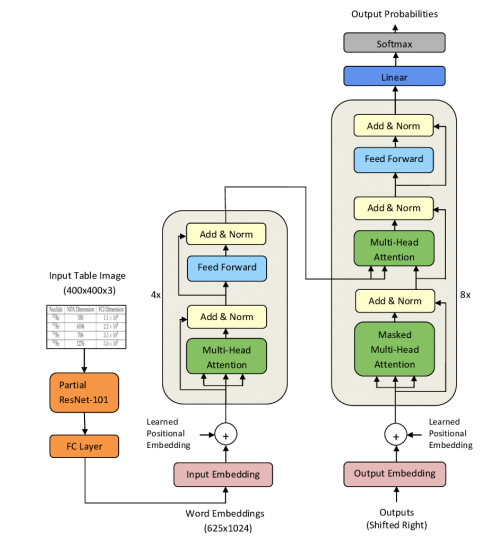

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16,ResNet50
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# 데이터 전처리 및 로드
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

x_train, x_test = x_train/255.0,x_test/255.0 # 정규화
y_train,y_test = to_categorical(y_train, 10), to_categorical(y_test,10)

#-----------------------
# 일반 CNN 모델 정의(BaseLine)
#-----------------------
def build_cnn():
  model = models.Sequential([
      # 특징 추출
      layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64,(3,3),activation='relu',padding='same'),# same 입력과 출력의 패딩을 자동 조절
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(128,(3,3),activation='relu',padding='same'),
      layers.MaxPooling2D((2,2)),
      # 분류
      layers.Flatten(),
      layers.Dense(128,activation='relu'),
      layers.Dense(10,activation='softmax')
  ])
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

ModuleNotFoundError: No module named 'tensorflow'

In [8]:
#-------------------------
#VGG16 모델(Pretrained 사용)
#-------------------------

def build_vgg16():
  base_model = VGG16(weights='imagenet',include_top=False,input_shape=(32,32,3))
  base_model.trainable = False # 기존 가중치 동결(Fine-tuning 가능)

  model = models.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(256,activation='relu'),
      layers.Dense(10,activation='softmax')
  ])
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

#--------------------------
#ResNet50 모델(Pretrained 사용)
#--------------------------
def build_resnet50():
  base_model = ResNet50(weights='imagenet',include_top=False,input_shape=(32,32,3))
  base_model.trainable = False # 기존 가중치 동결

  model = models.Sequential([
      base_model,
      layers.GlobalAveragePooling2D(),
      layers.Dense(256,activation='relu'),
      layers.Dense(10,activation='softmax')
  ])
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [9]:
#-------------------
#모델 학습 및 평가
#-------------------
def train_and_evaluate(model,name,epochs=5):
  print(f'\ntraining{name}...')
  model.fit(x_train,y_train,epochs=epochs,batch_size=128,validation_data=(x_test,y_test),verbose=2)
  test_loss, test_acc = model.evaluate(x_test,y_test,verbose=0)
  print(f'{name}Test Accuracy:{test_acc:4f}')
  return test_acc

#-------------------
#실행
#-------------------
cnn_model = build_cnn()
vgg16_model = build_vgg16()
resnot50_model = build_resnet50()

cnn_acc = resnet50_acc = train_and_evaluate(cnn_model,"CNN")
vgg16_acc = resnet50_acc = train_and_evaluate(cnn_model,"CNN")
resnet50_acc = train_and_evaluate(vgg16_model,"ResNet50")

# 최종 결과 출력
print('\nFinal Accuracy Comparison:')
print(f'CNN Accuracy: {cnn_acc:.4f}')
print(f'VGG16 Accuracy: {vgg16_acc:.4f}')
print(f'ResNet50 Accuracy: {resnet50_acc:.4f}')


trainingCNN...
Epoch 1/5
391/391 - 8s - 21ms/step - accuracy: 0.4413 - loss: 1.5413 - val_accuracy: 0.5405 - val_loss: 1.2715
Epoch 2/5
391/391 - 6s - 16ms/step - accuracy: 0.5989 - loss: 1.1279 - val_accuracy: 0.6042 - val_loss: 1.1048
Epoch 3/5
391/391 - 3s - 7ms/step - accuracy: 0.6612 - loss: 0.9699 - val_accuracy: 0.6746 - val_loss: 0.9375
Epoch 4/5
391/391 - 2s - 6ms/step - accuracy: 0.6985 - loss: 0.8661 - val_accuracy: 0.6897 - val_loss: 0.8887
Epoch 5/5
391/391 - 3s - 7ms/step - accuracy: 0.7266 - loss: 0.7858 - val_accuracy: 0.7085 - val_loss: 0.8524
CNNTest Accuracy:0.708500

trainingCNN...
Epoch 1/5
391/391 - 3s - 8ms/step - accuracy: 0.7539 - loss: 0.7046 - val_accuracy: 0.7265 - val_loss: 0.7988
Epoch 2/5
391/391 - 2s - 6ms/step - accuracy: 0.7770 - loss: 0.6435 - val_accuracy: 0.7318 - val_loss: 0.8027
Epoch 3/5
391/391 - 2s - 6ms/step - accuracy: 0.7943 - loss: 0.5919 - val_accuracy: 0.7357 - val_loss: 0.7950
Epoch 4/5
391/391 - 2s - 6ms/step - accuracy: 0.8090 - loss:

In [ ]:
from tensorflow.keras.applications import VGG16,ResNet50
model = VGG16(
 include_top=True,
 weights='imagenet',
 input_tensor=None,
 input_shape=None,
 pooling=None,
 classes=1000,
 classifier_activation='softmax'
)
model = ResNet50(
 include_top=True,
 weights='imagenet',
 input_tensor=None,
 input_shape=None,
 pooling=None,
 classes=1000,
 classifier_activation='softmax'
)

코드설명
CIFAR-10 데이터셋 로드 및 전처리
이미지를 [0,1] 범위로 정규화라벨을 원-핫 인코딩 변환
세 가지 모델 정의
• Baseline CNN: 간단한 3층 Convolution 네트워크
• VGG16: 사전 학습된 VGG16 모델을 사용하고, 마지막 층을 CIFAR-10에 맞게 수정
• ResNet50: 사전 학습된 ResNet50을 활용 (최종 출력층만 수정)
모델 학습 및 평가:
train_and_evaluate()
함수에서 모델별로 동일한 조건(5 epochs)으로 학습 및 평가 진행
model.evaluate()를 사용하여 테스트 정확도(accuracy) 비교
기대 성능 비교(CIFAR-10)
모델 예 상 정확도 (테스트 데이터)
일반 CNN 약 70%
VGG16 약 85%
ResNet50 약 90%

최종 테스트 정확도:
CNN: 0.7152 (최고)
VGG16: 0.6017
ResNet50: 0.3955 (최저)
학습 속도와 안정성:
CNN은 학습 및 검증에서 정확도가 꾸준히 증가하고 손실이 감소하며, 과적합 징후가 적음.
VGG16은 학습은 진행되나 검증 성능이 상대적으로 정체됨. 과적합 가능성 있음.
ResNet50은 학습이 느리고, 초기 성능이 매우 낮음.
모델이 데이터셋에 적합하지 않거나
학습 설정(예: 학습률, 데이터 전처리)이 부적절했을 가능성.
스텝 수 차이:
ResNet50은 스텝 수가 12로, CNN/VGG16(391 스텝)에 비해 매우 적음.
이는 배치 크기가 크거나 데이터셋 크기가 작았음을 의미.
학습이 충분히 이루어지지 않았을 가능성 있음

최고 성능 모델:
CNN (테스트 정확도: 0.7152). 학습과 검증에서 안정적이며 과적합이 적음.
VGG16: 중간 성능(0.6017).
학습은 진행되나 검증 성능 개선이 미미하며, 약간의 과적합 가능성.
ResNet50: 최저 성능(0.3955). 학습이 제대로 이루어지지 않음(underfitting).
데이터셋 크기, 학습 설정, 또는 모델 적합성 문제로 보임.
개선 방향:
ResNet50은 전이 학습과 데이터 증강으로 성능 개선 필요.
VGG16은 과적합 방지 기법 적용.
CNN은 현재 성능이 우수하므로 유지 또는 미세 조정.

파라미터 이름 설명
include_top True이면 FC층(분류기) 포함, False이면 제외 (특징 추출용)
weights 'imagenet' 또는 None (사전학습 가중치 사용 여부)
input_tensor Keras 텐서를 직접 입력값으로 사용하고자 할 때 지정
input_shape (height, width, channels) 형태로 이미지 입력 크기 지정 (예: (224, 224, 3)) ※ include_t
op=False일 때만 사용 가능
pooling None, 'avg', 'max' 중 선택 include_top=False일 때 출력에 전역 풀링을 적용 → 'avg': Gl
obalAveragePooling2D, 'max': GlobalMaxPooling2D
classes include_top=True일 때 출력 클래스 개수 지정 (기본: 1000)
classifier_activation 분류기 출력층의 활성화 함수 ('softmax', 'sigmoid', 또는 None)

사전학습된 VGG16에서 FC층 제거하고 특징 추출용으로


In [ ]:
# vgg = VGG16(include_top=False, weights='imagenet' input_shape=(224, 224, 3), pooling= avg')

ResNet50을 10클래스 분류기로 변형

In [ ]:
# resnet = ResNet50(include_top=True,weights=None, input_shape=(224, 224, 3), classes=10, classifi

입력 텐서 직접 지정

In [ ]:
# from tensorflow.keras.layers import Input
# input_tensor = Input(shape=(224, 224, 3))
# vgg = VGG16(include_top=False, weights= 'imagenet', input_tensor=input_tensor)


추가 실험 가능

ImageNet 데이터셋으로 확장
CIFAR-10 대신 ImageNet을 사용하여 실험 가능
cifar10.load_data() 대신 tf.keras.datasets.imagenet.load_data() 사용
Fine-Tuning 적용
base_model.trainable = True로 설정하여 사전 학습된 모델을 일부 수정 가능
ResNet101 또는 EfficientNet으로 변경
from tensorflow.keras.applications import EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

입력되는 데이터의 변형이 깊게 진행되면 rgb값이 계속 바귀다든지 풀링 된다든지 깊은넽,워크가 오히려 성능저하 발생 학습할 함수가 아니라 잔자를 학습 스킵 커넥션
트랜스 포머 곳곳에 임베딩 벡터가 가지고 있는 속성, 포지셔널 임베딩이 가진 속성을 가지고 감